# Student Social Media Addiction Analysis Project

## Project Overview
This project analyzes the 'Students Social Media Addiction.csv' dataset to understand the patterns of social media usage among students and its impact on their academic performance, mental health, and sleep patterns. We will perform Exploratory Data Analysis (EDA) and build a machine learning model to predict the addiction score based on various features.

## Objectives
1.  Load and inspect the dataset.
2.  Clean the data and handle missing values if any.
3.  Visualize the data to find trends and correlations.
4.  Preprocess the data for machine learning.
5.  Build a predictive model for 'Addicted_Score'.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline

## 1. Load Data

In [2]:
# Load the dataset
file_path = 'Students Social Media Addiction.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the path.")

# Display the first few rows
df.head()

Dataset loaded successfully!


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


## 2. Data Inspection and Cleaning

In [3]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [4]:
# Check for missing values
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [5]:
# Summary statistics
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


## 3. Exploratory Data Analysis (EDA)

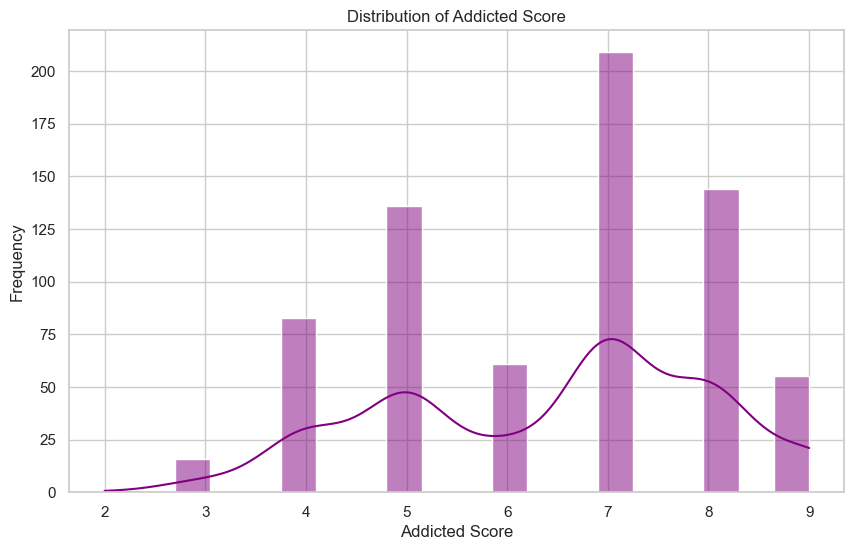

In [6]:
# Visualizing the distribution of the target variable: Addicted_Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Addicted_Score'], kde=True, bins=20, color='purple')
plt.title('Distribution of Addicted Score')
plt.xlabel('Addicted Score')
plt.ylabel('Frequency')
plt.show()

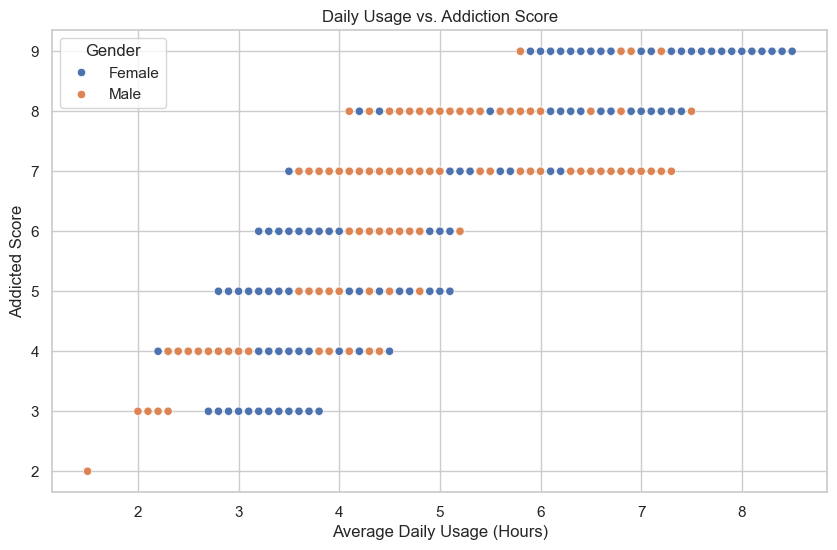

In [7]:
# Relationship between Daily Usage and Addiction Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Avg_Daily_Usage_Hours', y='Addicted_Score', hue='Gender')
plt.title('Daily Usage vs. Addiction Score')
plt.xlabel('Average Daily Usage (Hours)')
plt.ylabel('Addicted Score')
plt.show()

C:\Users\gkgan\AppData\Local\Temp\ipykernel_8996\3933380256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Affects_Academic_Performance', y='Addicted_Score', data=df, palette='Set2')


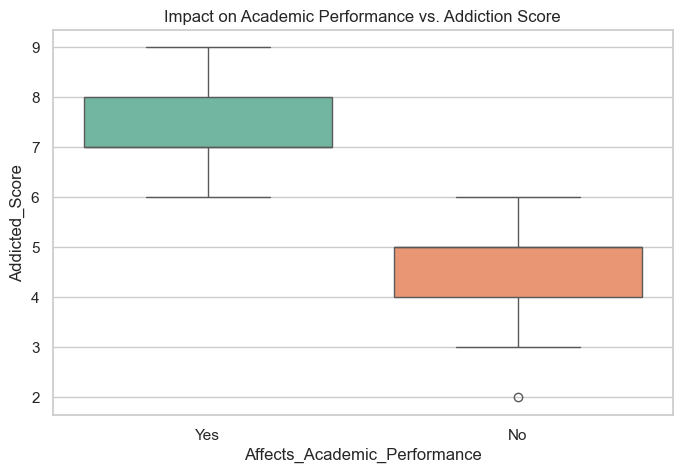

In [8]:
# Impact of Social Media on Academic Performance
plt.figure(figsize=(8, 5))
sns.boxplot(x='Affects_Academic_Performance', y='Addicted_Score', data=df, palette='Set2')
plt.title('Impact on Academic Performance vs. Addiction Score')
plt.show()

C:\Users\gkgan\AppData\Local\Temp\ipykernel_8996\81427254.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Most_Used_Platform', data=df, order=df['Most_Used_Platform'].value_counts().index, palette='viridis')


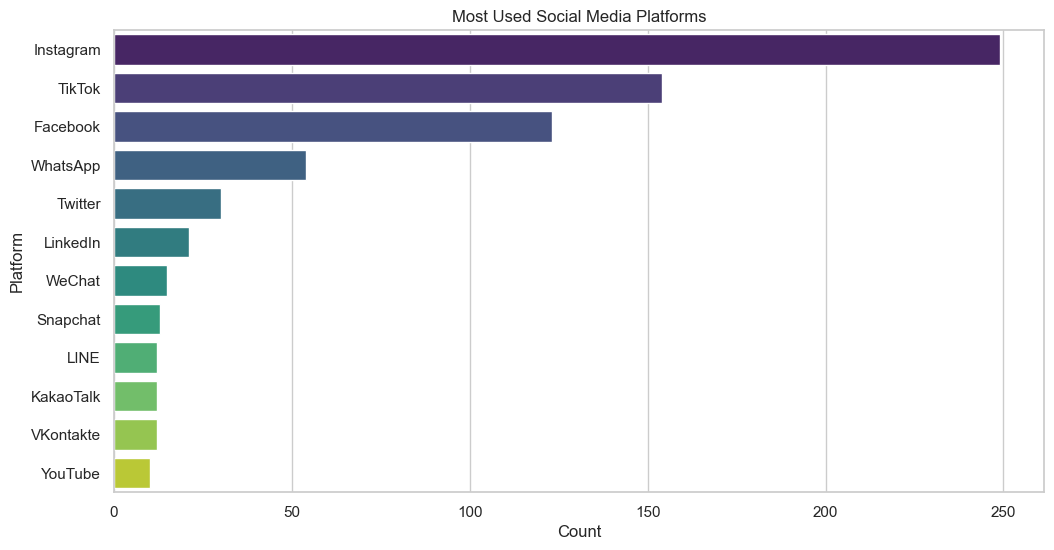

In [9]:
# Most Used Platform Analysis
plt.figure(figsize=(12, 6))
sns.countplot(y='Most_Used_Platform', data=df, order=df['Most_Used_Platform'].value_counts().index, palette='viridis')
plt.title('Most Used Social Media Platforms')
plt.xlabel('Count')
plt.ylabel('Platform')
plt.show()

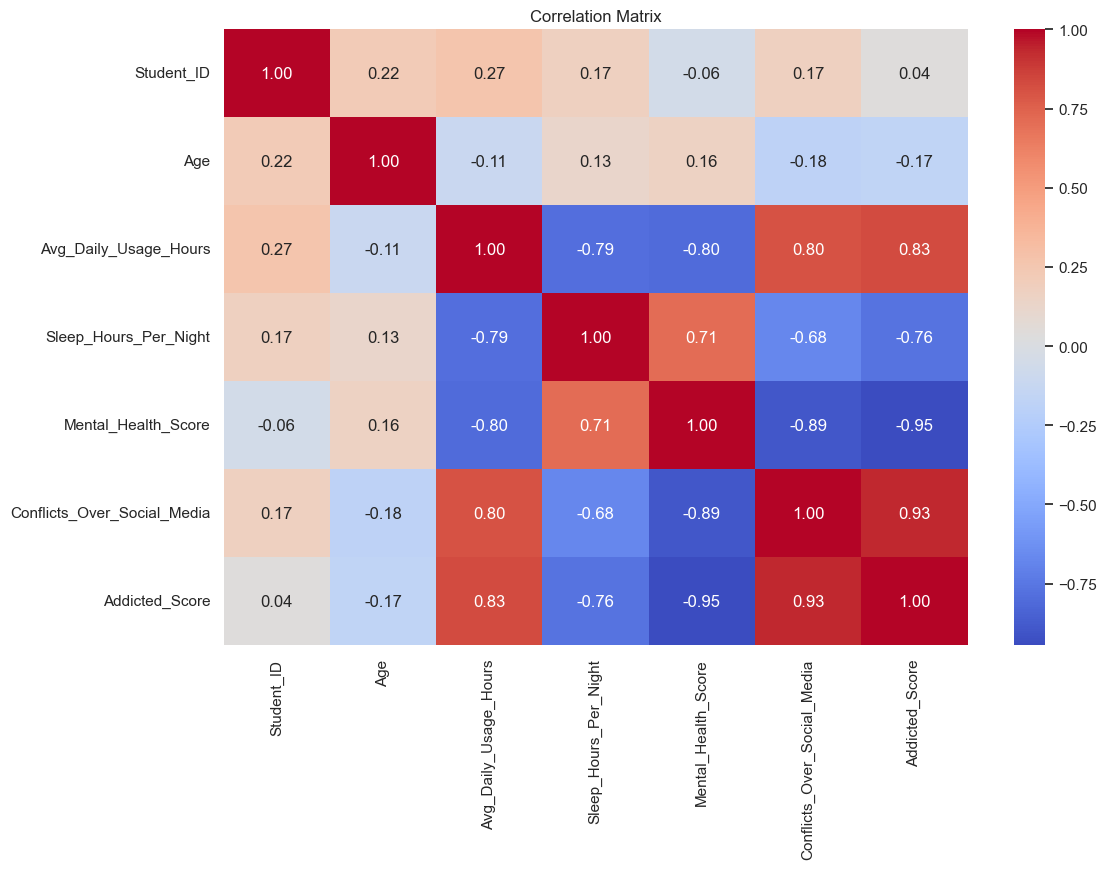

In [10]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 4. Data Preprocessing

In [11]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 
                       'Affects_Academic_Performance', 'Relationship_Status']

df_encoded = df.copy()

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop Student_ID as it's not a predictive feature
if 'Student_ID' in df_encoded.columns:
    df_encoded = df_encoded.drop('Student_ID', axis=1)

df_encoded.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,0,2,10,5.2,1,1,6.5,6,1,3,8
1,22,1,0,39,2.1,7,0,7.5,8,2,0,3
2,20,0,2,102,6.0,6,1,5.0,5,0,4,9
3,18,1,1,101,3.0,11,0,7.0,7,2,1,4
4,21,1,0,18,4.5,0,1,6.0,6,1,2,7


## 5. Model Building and Evaluation
We will build a Random Forest Regressor model to predict the `Addicted_Score`.

In [12]:
# Split data into features (X) and target (y)
X = df_encoded.drop('Addicted_Score', axis=1)
y = df_encoded['Addicted_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 0.0443
R^2 Score: 0.9823


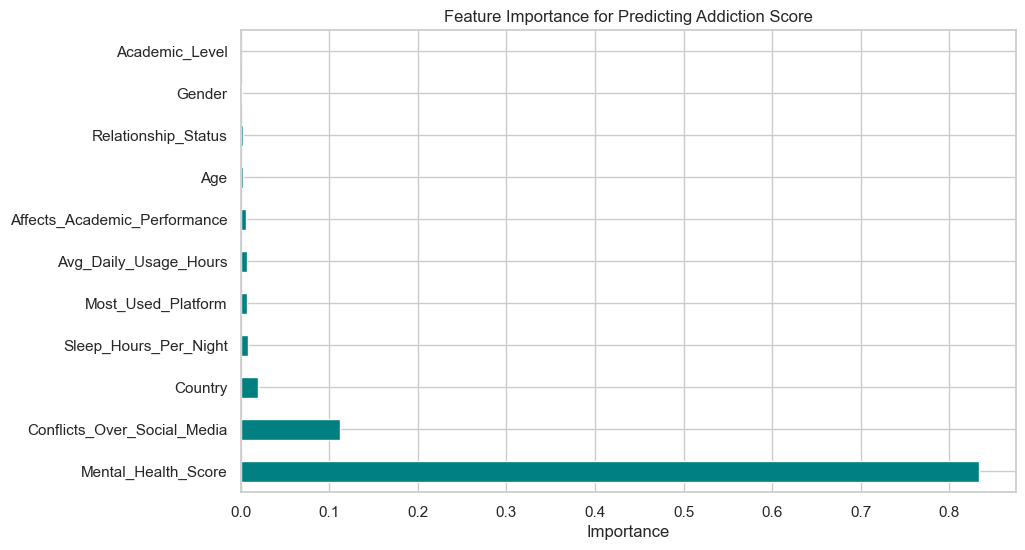

In [13]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=False).plot(kind='barh', color='teal')
plt.title('Feature Importance for Predicting Addiction Score')
plt.xlabel('Importance')
plt.show()

## Conclusion
This notebook explored the Social Media Addiction dataset, visualized key trends, and built a machine learning model to predict addiction scores. The feature importance plot helps identify which factors contribute most to social media addiction among students.